# Coursera course exploration

In [267]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Setup Complete')

Setup Complete


In [268]:
courses = pd.read_csv("Coursera_data.csv", index_col=[0])
courses[:3]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k


# Data cleaning

In [269]:
courses.shape

(891, 6)

In [270]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 134 to 163
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 48.7+ KB


In [271]:
courses.isnull().sum()

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

In [272]:
courses.duplicated().any()

False

In [273]:
map = courses.duplicated("course_title", keep=False)
courses[map]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
756,Developing Your Musicianship,Berklee College of Music,COURSE,4.8,Mixed,41k
205,Developing Your Musicianship,Berklee College of Music,SPECIALIZATION,4.8,Beginner,54k
181,Machine Learning,University of Washington,SPECIALIZATION,4.6,Intermediate,290k
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3.2m
241,Marketing Digital,Universidade de São Paulo,COURSE,4.8,Beginner,81k
325,Marketing Digital,Universidad Austral,SPECIALIZATION,4.7,Beginner,39k


No duplicates or Null values

In [ ]:
# removing any possible excess spaces
courses = courses.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [275]:
courses.dtypes

course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

In [276]:
# Changing 'course_students_enrolled' to numeric form
def convert_to_num(value):
    if isinstance(value, str):
        if "k" in value:
            return int(float(value.replace("k", "").replace(",", "")) * 1000)
        elif "m" in value:
            return int(float(value.replace("m", "").replace(",", "")) * 1000000)

    return int(value)


courses.course_students_enrolled = courses.course_students_enrolled.apply(
    convert_to_num
)
courses

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000
...,...,...,...,...,...,...
236,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52000
883,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21000
545,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30000
875,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9800


# EDA

Categorical

In [277]:
list(courses.select_dtypes(include="object").columns)

['course_title',
 'course_organization',
 'course_Certificate_type',
 'course_difficulty']

Numeric

In [278]:
list(courses.select_dtypes(exclude="object").columns)

['course_rating', 'course_students_enrolled']

Number of organizations

In [198]:
courses.course_organization.value_counts().size

154

Text(0.5, 0, 'Rating')

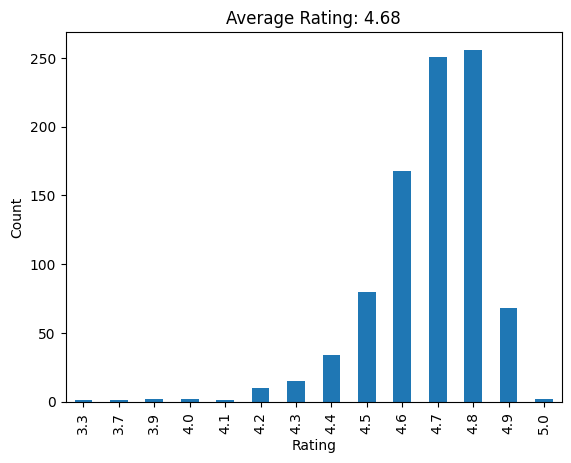

In [528]:
rating_counts = courses["course_rating"].value_counts()
rating_counts.sort_index().plot(kind="bar")
plt.title(f"Average Rating: {courses['course_rating'].mean():.2f}")
plt.ylabel("Count")
plt.xlabel("Rating")

Text(0.5, 0, 'Difficulty Level')

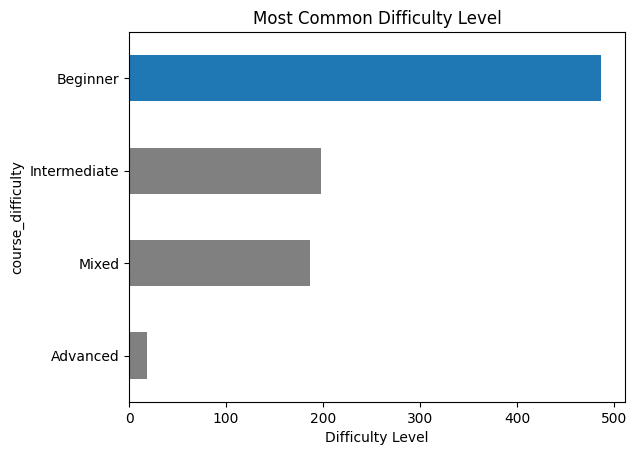

In [562]:
ax = courses.groupby("course_difficulty").size().sort_values().plot(kind="barh")
for i in range(len(ax.patches)):
    if i != 3:
        ax.patches[i].set_facecolor("grey")
fig.suptitle(
    f"Average enrolled count: {courses['course_students_enrolled'].mean():,.0f}",
    fontsize=14,
)
plt.title("Most Common Difficulty Level")
plt.xlabel("Difficulty Level")

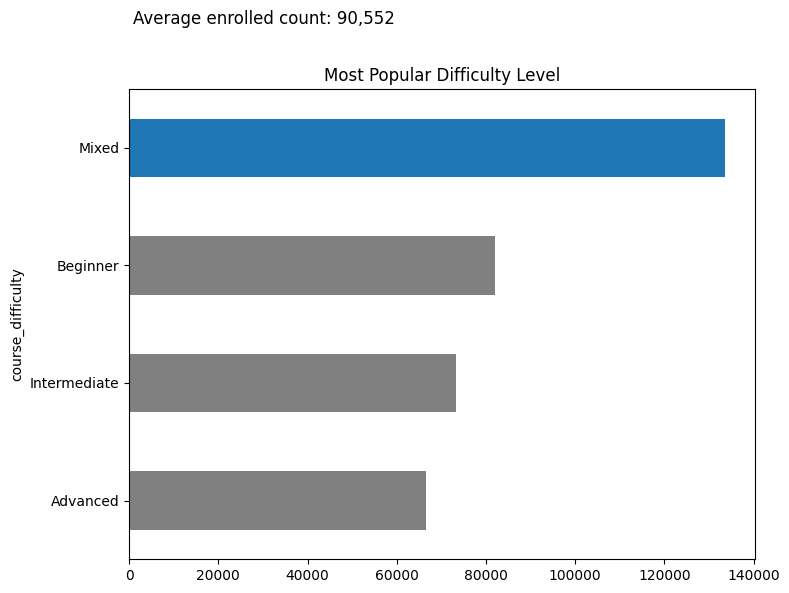

In [577]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = (
    courses.groupby("course_difficulty")
    .course_students_enrolled.mean()
    .sort_values()
    .plot(kind="barh")
)

for i in range(len(ax.patches)):
    if i != 3:
        ax.patches[i].set_facecolor("grey")


fig.suptitle(
    f"Average enrolled count: {courses['course_students_enrolled'].mean():,.0f}\n",
    ha="right",
)
plt.title("Most Popular Difficulty Level")
plt.tight_layout()
plt.show()

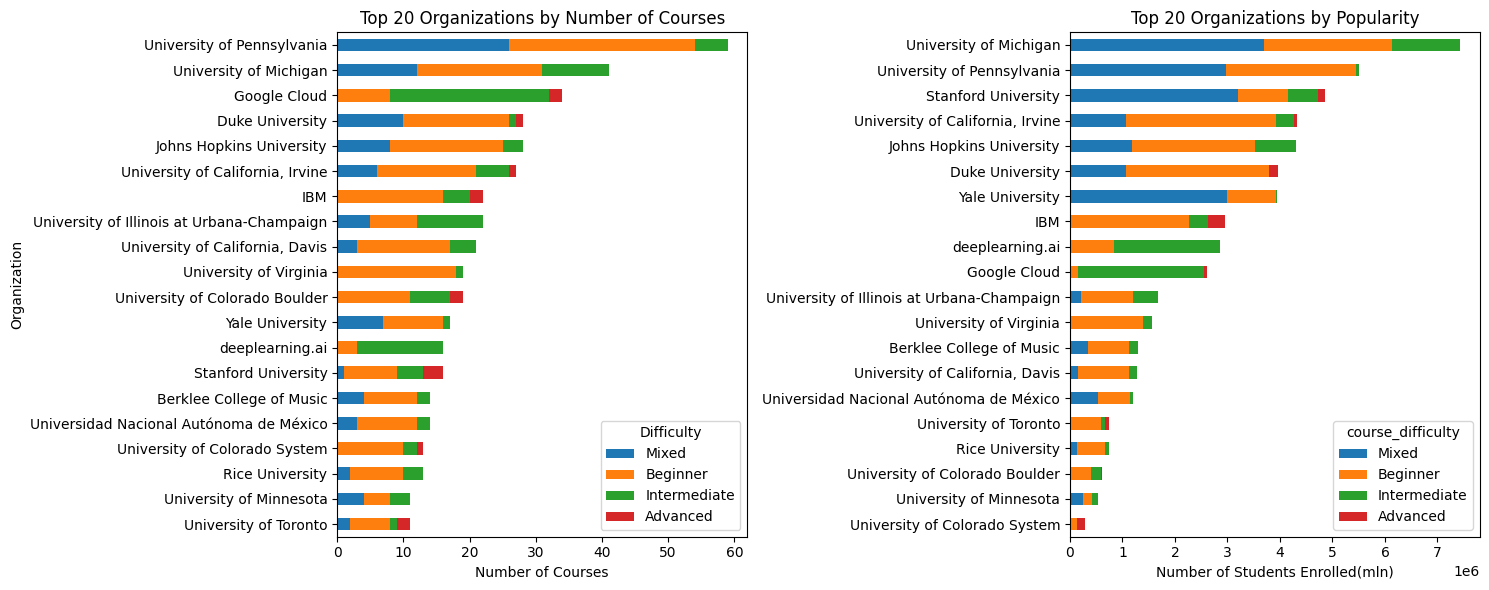

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Extract top 20 organizations
top_org = (
    courses["course_organization"]
    .value_counts()
    .sort_values(ascending=False)
    .head(20)
    .index
)
top_courses = courses[courses.course_organization.isin(top_org)]

# Prepare data for Plot 1
pivot_table = top_courses.pivot_table(
    index="course_organization",
    columns="course_difficulty",
    aggfunc="size",
)
pivot_table = pivot_table.reindex(  # Columns order
    columns=["Mixed", "Beginner", "Intermediate", "Advanced"]
)

pivot_table["total"] = pivot_table.sum(axis=1)
pivot_table = pivot_table.sort_values(
    by=["total", "Mixed"], ascending=True
)  # Ordering by total

pivot_table.loc[:, pivot_table.columns != "total"].plot(
    kind="barh", stacked=True, ax=axes[0]
)
axes[0].set_title("Top 20 Organizations by Number of Courses")
axes[0].set_ylabel("Organization")
axes[0].set_xlabel("Number of Courses")
axes[0].legend(title="Difficulty", loc="lower right")

# Plot 2: Top organizations by enrolled count

top_org_enrolled = (
    courses.groupby("course_organization")
    .course_students_enrolled.sum()
    .sort_values(ascending=False)[:20]
    .index
)
top_enrolled = courses[courses.course_organization.isin(top_org)]

pivot_table_enrolled = top_enrolled.pivot_table(
    index="course_organization",
    columns="course_difficulty",
    values="course_students_enrolled",
    aggfunc="sum",
    fill_value=0,
)
pivot_table_enrolled = pivot_table_enrolled.reindex(  # Columns order
    columns=[
        "Mixed",
        "Beginner",
        "Intermediate",
        "Advanced",
    ]
)

pivot_table_enrolled["total"] = pivot_table_enrolled.sum(axis=1)  # Finding total
pivot_table_enrolled = pivot_table_enrolled.sort_values(  # Ordering by total
    by=["total", "Mixed"], ascending=True
)


pivot_table_enrolled.loc[:, pivot_table_enrolled.columns != "total"].plot(
    kind="barh",
    stacked=True,
    ax=axes[1],
)
axes[1].set_title("Top 20 Organizations by Popularity")
axes[1].set_xlabel("Number of Students Enrolled(mln)")
axes[1].set_ylabel("")

fig.tight_layout()

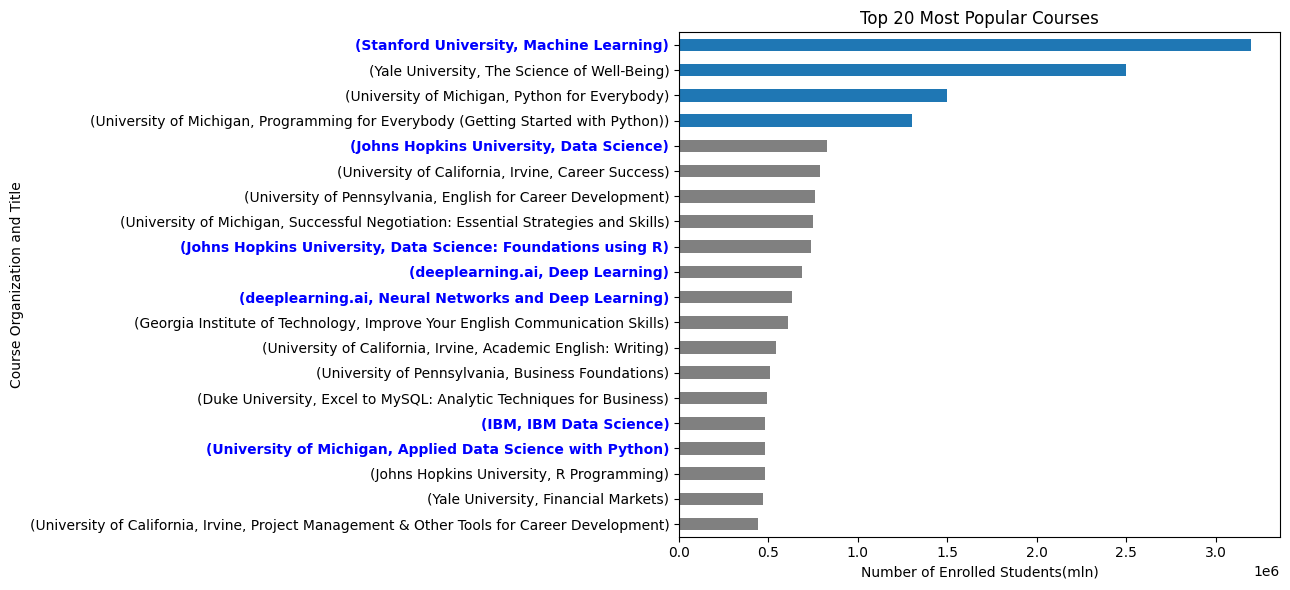

In [532]:
top_20_courses = (
    courses.groupby(["course_organization", "course_title"])
    .course_students_enrolled.sum()
    .sort_values(ascending=False)[:20]
)

# Reverse the order for horizontal bar chart
top_20_courses = top_20_courses.iloc[::-1]

# Plot the bar chart
ax = top_20_courses.plot(kind="barh", figsize=(13, 6))
plt.ylabel("Course Organization and Title")
plt.xlabel("Number of Enrolled Students(mln)")
plt.title("Top 20 Most Popular Courses")

# Highlight specific labels
highlight_keywords = ["Machine Learning", "Data Science", "Deep Learning"]
for label in ax.get_yticklabels():
    for keyword in highlight_keywords:
        if keyword in label.get_text():
            label.set_color("blue")
            label.set_fontweight("bold")

for i in range(len(ax.patches) - 4):
    ax.patches[i].set_facecolor("grey")

plt.tight_layout()
plt.show()

All **Data Science** related courses are marked <span style="color: blue; font-weight: bold;">blue</span>.